In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose 
from sklearn.metrics import root_mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [30]:
df =pd.read_csv(r"Air Passenger Data.csv")

In [31]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


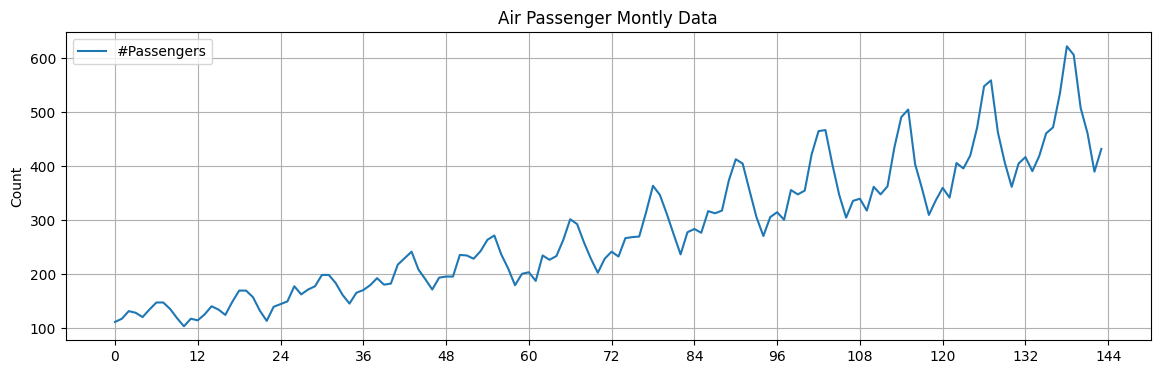

In [32]:
df.plot(figsize=(14,4),ylabel ="Count",title="Air Passenger Montly Data")
plt.xticks(range(0,145,12))
plt.grid()
plt.show()

In [33]:
df.set_index("Month",inplace=True)

In [34]:
df.columns =["Values"]

In [35]:
df.set_index(pd.to_datetime(df.index),inplace=True)

In [36]:
result =seasonal_decompose(df)

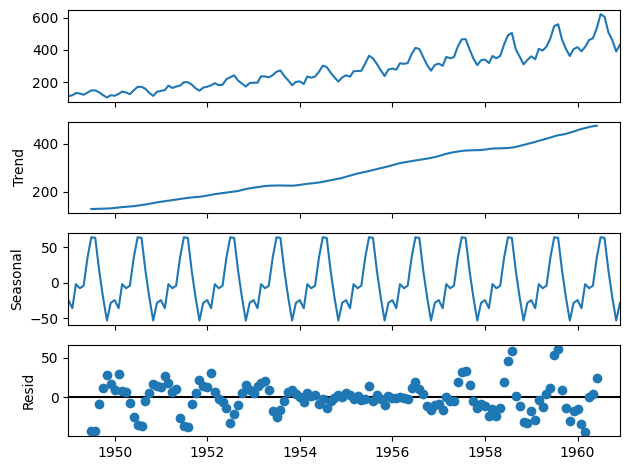

In [37]:
result.plot();

In [38]:
best_order =(4,2,3)

In [39]:
model= ARIMA(df,order=best_order)

In [40]:
rs= model.fit()

In [41]:
forecast=rs.get_forecast(steps=12)

In [42]:
forecast.predicted_mean

1961-01-01    476.779659
1961-02-01    480.723567
1961-03-01    488.210871
1961-04-01    464.645932
1961-05-01    479.033313
1961-06-01    477.047158
1961-07-01    480.674587
1961-08-01    492.256026
1961-09-01    479.536395
1961-10-01    497.542384
1961-11-01    486.642799
1961-12-01    496.471037
Freq: MS, Name: predicted_mean, dtype: float64

In [43]:
df.tail()

,Values
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


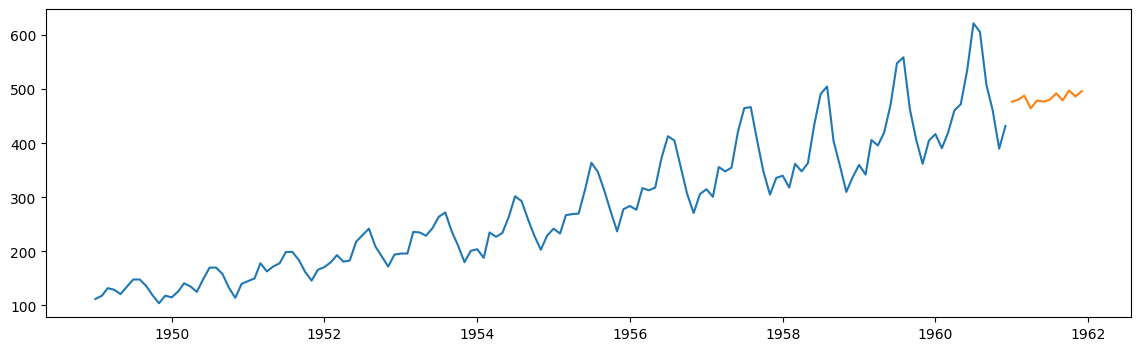

In [47]:
plt.figure(figsize=(14,4))
plt.plot(df["Values"])
plt.plot(forecast.predicted_mean)

plt.show()

In [49]:
best_pdq =None
best_aic =np.inf

In [52]:
for p in range(9,14):
    for d in range(1,5):
        for q in range(6,12):
            m= ARIMA(df,order=(p,d,q))
            res=m.fit()

            if res.aic <best_aic:
                best_aic=res.aic
                best_order=(p,d,q)
        print("AIC:- ",res.aic,"Order:- ",(p,d,q))
            

AIC:-  1279.930269229614 Order:-  (9, 1, 11)
AIC:-  1305.2272506029835 Order:-  (9, 2, 11)
AIC:-  1316.423014148364 Order:-  (9, 3, 11)
AIC:-  1317.5747710726494 Order:-  (9, 4, 11)
AIC:-  1232.2863963148945 Order:-  (10, 1, 11)
AIC:-  1176.906500078207 Order:-  (10, 2, 11)
AIC:-  1214.4049176983417 Order:-  (10, 3, 11)
AIC:-  1318.3154941224038 Order:-  (10, 4, 11)
AIC:-  1176.9935991135374 Order:-  (11, 1, 11)
AIC:-  1148.9393643520193 Order:-  (11, 2, 11)
AIC:-  1174.6925467494702 Order:-  (11, 3, 11)
AIC:-  1223.8138420038815 Order:-  (11, 4, 11)
AIC:-  1155.8481227816756 Order:-  (12, 1, 11)
AIC:-  1156.4563480614927 Order:-  (12, 2, 11)
AIC:-  1202.153684373014 Order:-  (12, 3, 11)
AIC:-  1254.7599023822524 Order:-  (12, 4, 11)
AIC:-  1154.2320929967095 Order:-  (13, 1, 11)
AIC:-  1153.9923021297818 Order:-  (13, 2, 11)
AIC:-  1194.7696024860893 Order:-  (13, 3, 11)
AIC:-  1285.4718928121492 Order:-  (13, 4, 11)


In [53]:
best_aic

np.float64(1140.0681486940136)

In [54]:
best_order

(11, 2, 7)

In [61]:
final_model =ARIMA(df,order=best_order)

In [62]:
final_result =final_model.fit()

In [56]:
final_model =final_model.fit()

In [63]:
final_forecast=final_result.get_forecast(steps=24)

In [64]:
predictions =final_forecast.predicted_mean

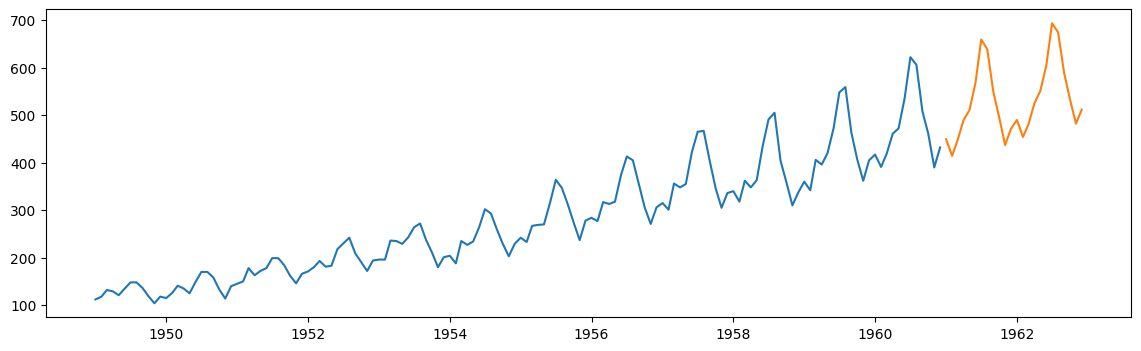

In [66]:
plt.figure(figsize=(14,4))
plt.plot(df["Values"])
plt.plot(predictions)
plt.show()